In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = ox.graph_from_bbox(2.8765, 2.7503, -60.6267, -60.7805, network_type='drive', infrastructure='way["highway"~"tertiary|primary|secondary"]', clean_periphery=True, simplify=True)

G_proj    = ox.project_graph(G)
Z_cleaned = ox.clean_intersections(G_proj, tolerance = 15)

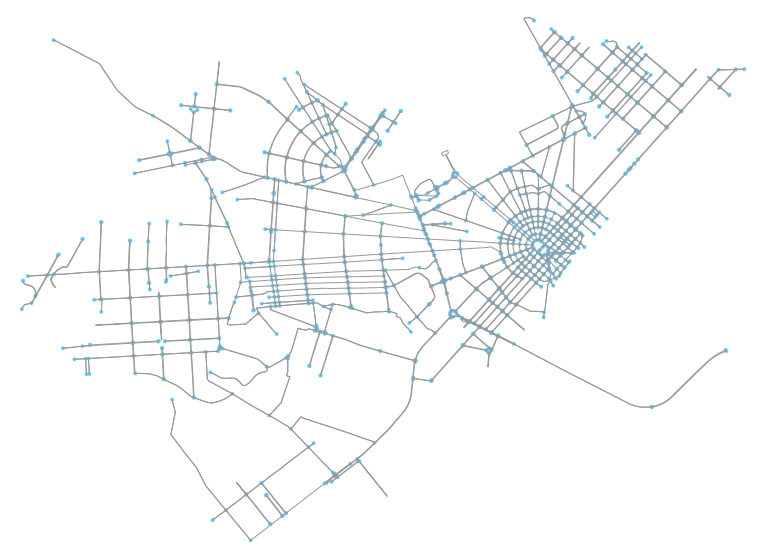

(<Figure size 969.953x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f47f3f25710>)

In [3]:
ox.plot_graph(G_proj, fig_height=10, show=True)

In [4]:
G.nodes(data=True)

NodeDataView({3181068342: {'y': 2.7969744, 'x': -60.7250881, 'osmid': 3181068342}, 321519672: {'y': 2.8234227, 'x': -60.6722277, 'osmid': 321519672}, 1895579704: {'y': 2.800928, 'x': -60.7449928, 'osmid': 1895579704}, 3181068350: {'y': 2.7938626, 'x': -60.7408308, 'osmid': 3181068350}, 321519687: {'y': 2.8247349, 'x': -60.6735174, 'osmid': 321519687}, 1895579715: {'y': 2.8084138, 'x': -60.6953911, 'osmid': 1895579715}, 1895579733: {'y': 2.8401713, 'x': -60.6737277, 'osmid': 1895579733}, 321519708: {'y': 2.8184016, 'x': -60.6718551, 'osmid': 321519708}, 1895579741: {'y': 2.8603879, 'x': -60.6551009, 'osmid': 1895579741}, 321519710: {'y': 2.8036421, 'x': -60.6848741, 'osmid': 321519710, 'highway': 'traffic_signals'}, 3881992295: {'y': 2.7996914, 'x': -60.6883417, 'osmid': 3881992295}, 3881992296: {'y': 2.7995889, 'x': -60.6884324, 'osmid': 3881992296}, 318390522: {'y': 2.8198634, 'x': -60.6945423, 'osmid': 318390522}, 1673707803: {'y': 2.7985798, 'x': -60.6834258, 'osmid': 1673707803}, 1

In [5]:
G.edges(data=True)

OutMultiEdgeDataView([(3181068342, 5046988925, {'osmid': 517108896, 'oneway': True, 'name': 'Avenida Rio Mucajaí', 'highway': 'secondary', 'length': 37.433, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f47f438e208>}), (3181068342, 1723236305, {'osmid': 655466735, 'name': 'Rua Mauro Campello', 'highway': 'secondary', 'oneway': False, 'length': 46.769999999999996, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f47f438e2e8>}), (3181068342, 1722256038, {'osmid': [312249626, 655466735], 'name': 'Rua Mauro Campello', 'highway': 'secondary', 'oneway': False, 'length': 510.276, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f47f438ef28>}), (321519672, 3589971255, {'osmid': 157934963, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary', 'length': 18.205}), (321519672, 3648084764, {'osmid': 154903789, 'oneway': True, 'name': 'Avenida Capitão Júlio Bezerra', 'highway': 'secondary', 'length': 150.154, 'geometry': <shapely.geome

In [22]:
print(len(G.nodes), len(G.edges))

1496 2957


In [16]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="+")

for node in G.nodes(data=True):
    latLong = str(node[1]['y'])+","+str(node[1]['x'])
    location = geolocator.reverse(latLong)
    print(location.raw['address']['suburb'])

Centro
Jóquei Clube
Centro
Pintolândia
Jardim Tropical
Centro
Pricumã
31 de março
Centro
Paraviana
Calungá
13 de Setembro
13 de Setembro
Mecejana
13 de Setembro
13 de Setembro
13 de Setembro
Caranã
13 de Setembro
Paraviana
Paraviana
Paraviana
Paraviana
Paraviana
13 de Setembro
Calungá
Calungá
Caçari
Caçari
13 de Setembro
Paraviana
Paraviana
Cidade Satélite
Cidade Satélite
Cidade Satélite
Caçari
Paraviana
Estados
Paraviana
União
Paraviana
Paraviana
Paraviana
Paraviana
Caranã
Paraviana
Caçari
Paraviana
Paraviana
Pricumã
União
Pricumã
Caranã
Caçari
Paraviana
Caçari
Caçari


KeyboardInterrupt: 

In [26]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [27]:
page = requests.get("http://populacao.net.br/os-maiores-bairros-boa-vista_rr.html")
soup = BeautifulSoup(page.content, 'html.parser')
tabela = soup.find_all('td')

dic = {}
for i in range (0,len(tabela),2):
    dic[tabela[i].get_text()] = tabela[i+1].get_text()

dic

{'Pintolândia': '10.990',
 'Senador Hélio Campos': '10.010',
 'Caranã': '9.931',
 'Cambará': '9.488',
 'Buritis': '9.305',
 'Dr. Silvio Leite': '8.849',
 'Santa Luzia': '8.777',
 'Santa Tereza': '8.118',
 'Alvorada': '7.914',
 'Cauamé': '7.480',
 'Caimbé': '7.447',
 'Boa Vista (demais Setores)': '7.237',
 'Dr. Silvio Botelho': '7.188',
 'Pricumã': '7.051',
 'Tancredo Neves': '7.007',
 'Jóquei Clube': '6.515',
 'São Bento': '6.368',
 'São Vicente': '6.222',
 'Liberdade': '6.199',
 'Jardim Primavera': '6.186',
 'Mecejana': '6.134',
 'Nova Canaã': '6.007',
 'Cidade Satélite': '5.942',
 'Cinturão Verde': '5.907',
 'Raiar de Sol': '5.863',
 'Nova Cidade': '5.708',
 'Jardim Equatorial': '5.594',
 'Centenário': '5.497',
 'Paraviana': '5.443',
 'Asa Branca': '5.256',
 'Centro': '5.140',
 'Laura Moreira': '4.992',
 'Aparecida': '4.860',
 'Treze de Setembro': '4.643',
 'Dos Estados': '4.639',
 'Jardim Floresta': '4.546',
 'Professora Araceli Souto Maior': '4.102',
 'São Francisco': '3.992',
 'Un

In [30]:
for node in G.nodes(data=True):
    latLong = str(node[1]['y'])+","+str(node[1]['x'])
    location = geolocator.reverse(latLong)
    print(location.raw['address']['suburb'],dic[location.raw['address']['suburb']])

Jóquei Clube 6.515
Centro 5.140
Pintolândia 10.990
Jardim Tropical 2.073
Centro 5.140
Pricumã 7.051


KeyError: '31 de março'